In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv('D:\data analyst\Large Language Model\llm_comparison_dataset.csv')

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aungh\AppData\Local\Temp\ipykernel_42240\1469643195.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('D:\data analyst\Large Language Model\llm_comparison_dataset.csv')
d:\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Exploratory Data Analysis

In [2]:
df.head()

,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
0,DeepSeek-4,Deepseek,128000,95,2.74,85,1143,1,18.81,760952565,13,0.50,2,2,3
1,Llama-8,Meta AI,300000,284,3.21,71,1390,1,3.98,22891342,22,2.07,1,3,3
2,Llama-5,Meta AI,300000,225,2.95,85,1406,0,1.02,827422145,21,0.95,2,3,2
3,DeepSeek-3,Deepseek,2000000,242,12.89,72,1264,1,27.63,694305632,86,3.51,1,3,3
4,DeepSeek-8,Deepseek,1000000,71,3.80,77,1381,1,18.52,378552278,92,1.80,2,2,3


Change 1 and 0 into True and False(df['Open-Source'])

In [3]:
df['Open-Source'] = df['Open-Source'].astype(bool)
df['Open-Source']

0       True
1       True
2      False
3       True
4       True
       ...  
195    False
196     True
197     True
198     True
199    False
Name: Open-Source, Length: 200, dtype: bool

#What are the major provider in the market?

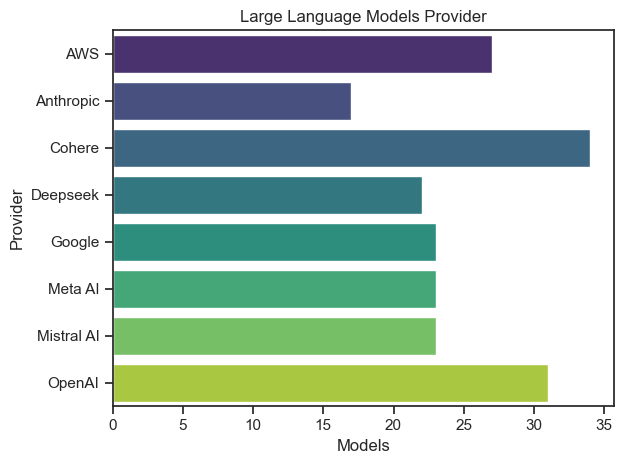

In [4]:
df_provider = df.groupby('Provider').size().reset_index(name='Models')
sns.set_theme(style='ticks')
sns.barplot(data=df_provider, x='Models', y='Provider',palette='viridis',legend=False,hue='Provider')


plt.title('Large Language Models Provider')
plt.tight_layout()
plt.show()


Top 3 Provider in Markets

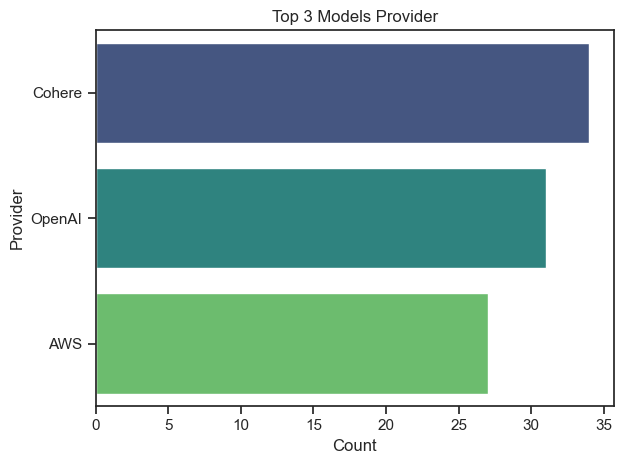

In [5]:
top3_provider = df['Provider'].value_counts().head(3).reset_index()
top3_provider.columns = ['Provider','Count']

# Set theme
sns.set_theme(style='ticks')

# Corrected barplot with explicit x and y
sns.barplot(data=top3_provider, x='Count', y='Provider', hue='Provider', palette='viridis', legend=False)

# Title and layout
plt.title('Top 3 Models Provider')
plt.tight_layout()
plt.show()

How many Open source in the market?

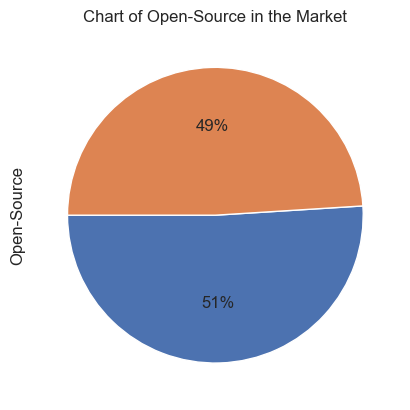

In [6]:
open_source = df['Open-Source'].value_counts()

sns.set_theme(style='darkgrid')
open_source.plot(kind='pie', startangle=180, autopct='%1.0f%%', labels=[''] * len(open_source))
plt.title('Chart of Open-Source in the Market')
plt.ylabel("Open-Source")
plt.show()

Which provider has the best models?

In [7]:
df_provider_metrics = df.groupby('Provider')[['Quality Rating','Speed Rating','Price Rating']].mean()
df_provider_metrics

,Quality Rating,Speed Rating,Price Rating
Provider,,,
AWS,2.000000,2.222222,2.814815
Anthropic,1.882353,2.117647,3.000000
Cohere,1.911765,2.235294,2.911765
Deepseek,1.954545,2.227273,2.954545
Google,1.434783,2.565217,2.956522
Meta AI,1.826087,2.347826,2.869565
Mistral AI,2.000000,2.217391,2.913043
OpenAI,2.096774,2.258065,2.903226


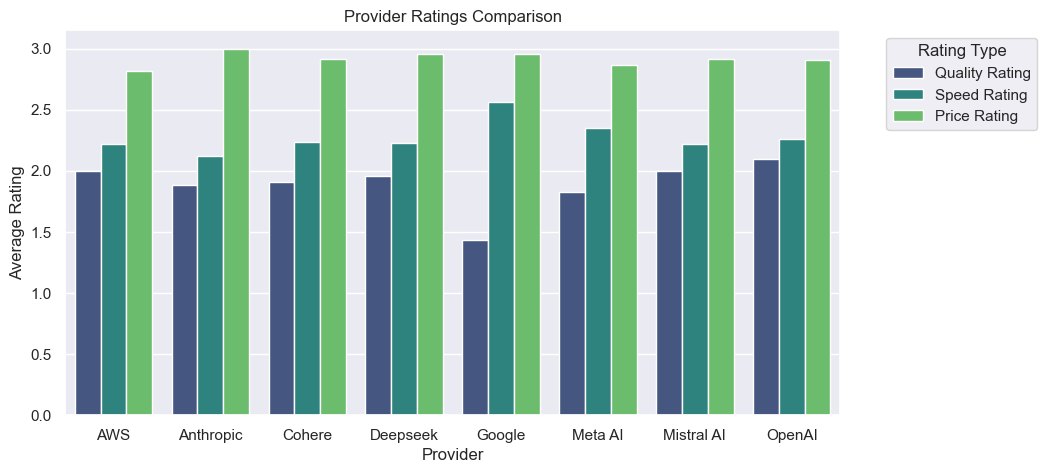

In [8]:
df_melted = df_provider_metrics.reset_index().melt(id_vars='Provider', var_name='Rating Type', value_name='Value')

plt.figure(figsize=(10, 5))
sns.barplot(data=df_melted, x='Provider', y='Value', hue='Rating Type', palette='viridis')
plt.title('Provider Ratings Comparison')
plt.ylabel('Average Rating')
plt.xlabel('Provider')
plt.legend(title='Rating Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1.Quality Rating:
 OpenAI leads in quality, making it the best option for high-quality outputs, while Google ranks the lowest in this category.

2.Speed Rating:
 Google is the fastest provider, significantly outperforming others in speed. On the other hand, Anthropic has the slowest response times, making it less ideal for speed-sensitive applications.

3.Price Rating:
 Google is also the most expensive option, which may impact cost-conscious users. AWS, however, stands out as the most affordable provider, making it a budget-friendly choice.

ValueError: could not convert string to float: 'DeepSeek-4'

In [9]:
df

,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
0,DeepSeek-4,Deepseek,128000,95,2.74,85,1143,True,18.81,760952565,13,0.50,2,2,3
1,Llama-8,Meta AI,300000,284,3.21,71,1390,True,3.98,22891342,22,2.07,1,3,3
2,Llama-5,Meta AI,300000,225,2.95,85,1406,False,1.02,827422145,21,0.95,2,3,2
3,DeepSeek-3,Deepseek,2000000,242,12.89,72,1264,True,27.63,694305632,86,3.51,1,3,3
4,DeepSeek-8,Deepseek,1000000,71,3.80,77,1381,True,18.52,378552278,92,1.80,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Gemini-3,Google,2000000,62,7.04,64,1222,False,29.10,186555415,67,1.15,1,2,3
196,Gemini-9,Google,2000000,259,3.80,92,1467,True,2.86,113913164,80,2.58,3,3,3
197,Nova-7,AWS,256000,130,18.19,79,939,True,20.19,571980809,7,4.22,2,2,3
198,GPT-4,OpenAI,128000,268,11.75,78,939,True,13.34,482443470,52,3.69,2,3,3


In [11]:
df.columns

Index(['Model', 'Provider', 'Context Window', 'Speed (tokens/sec)',
       'Latency (sec)', 'Benchmark (MMLU)', 'Benchmark (Chatbot Arena)',
       'Open-Source', 'Price / Million Tokens', 'Training Dataset Size',
       'Compute Power', 'Energy Efficiency', 'Quality Rating', 'Speed Rating',
       'Price Rating'],
      dtype='object')

In [13]:
df_quality = df.groupby('Provider')[['Quality Rating','Price Rating']].mean()
df_quality

,Quality Rating,Price Rating
Provider,,
AWS,2.000000,2.814815
Anthropic,1.882353,3.000000
Cohere,1.911765,2.911765
Deepseek,1.954545,2.954545
Google,1.434783,2.956522
Meta AI,1.826087,2.869565
Mistral AI,2.000000,2.913043
OpenAI,2.096774,2.903226


<Figure size 1000x600 with 0 Axes>

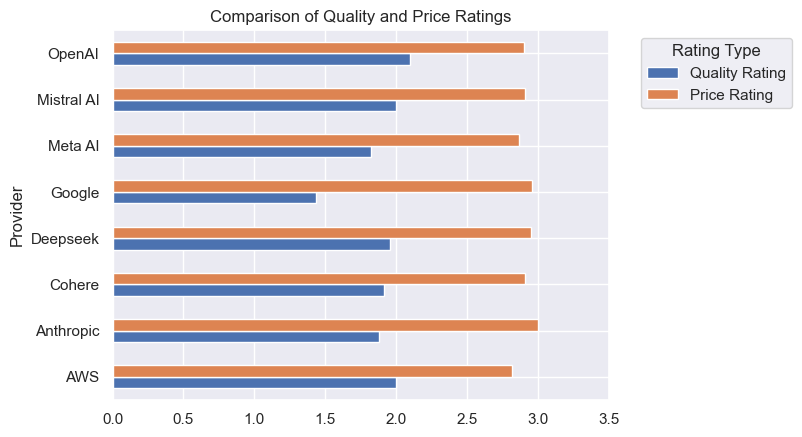

In [38]:
plt.figure(figsize=(10, 6))
df_quality.plot(kind='barh')
plt.title("Comparison of Quality and Price Ratings")
plt.legend(title='Rating Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,3.5)
plt.show()


In [39]:
df.columns

Index(['Model', 'Provider', 'Context Window', 'Speed (tokens/sec)',
       'Latency (sec)', 'Benchmark (MMLU)', 'Benchmark (Chatbot Arena)',
       'Open-Source', 'Price / Million Tokens', 'Training Dataset Size',
       'Compute Power', 'Energy Efficiency', 'Quality Rating', 'Speed Rating',
       'Price Rating'],
      dtype='object')

In [42]:
df.pivot_table(index='Quality Rating', columns='Speed Rating', aggfunc='size',fill_value=0)

Speed Rating,1,2,3
Quality Rating,,,
1,7,33,35
2,6,43,21
3,6,31,18
